In [1]:
%pip install ipython --quiet

from IPython.display import Markdown, display

display(Markdown("# 03_aggregation_analysis.ipynb"))
display(Markdown("### Philippine Temperature Analysis (2010–present) — Aggregation & Statistical Analysis"))
display(Markdown("""
This notebook performs **aggregation and statistical analysis** on the cleaned Philippine temperature dataset.
We analyze trends by **city, year, month, and season**, and compare **national vs city-level patterns**.
"""))

Note: you may need to restart the kernel to use updated packages.


# 03_aggregation_analysis.ipynb

### Philippine Temperature Analysis (2010–present) — Aggregation & Statistical Analysis


This notebook performs **aggregation and statistical analysis** on the cleaned Philippine temperature dataset.
We analyze trends by **city, year, month, and season**, and compare **national vs city-level patterns**.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
data_path = "../data/processed/phil_temp_2010_2024.csv"
df = pd.read_csv(data_path)

df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime'])

display(df.head())
display(df.info())
display(df.describe())

,city_name,datetime,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,Alaminos,2010-01-01,26.6,29.9,24.8,32.0,26.5
1,Alaminos,2010-01-02,26.7,29.4,25.0,32.1,27.4
2,Alaminos,2010-01-03,26.0,27.6,24.5,30.9,28.6
3,Alaminos,2010-01-04,25.9,28.8,23.1,33.6,27.5
4,Alaminos,2010-01-05,26.4,28.5,24.5,33.7,28.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552212 entries, 0 to 552211
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   city_name                 552212 non-null  object        
 1   datetime                  552212 non-null  datetime64[ns]
 2   temperature_2m_mean       552212 non-null  float64       
 3   temperature_2m_max        552212 non-null  float64       
 4   temperature_2m_min        552212 non-null  float64       
 5   apparent_temperature_max  500324 non-null  float64       
 6   apparent_temperature_min  500324 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 29.5+ MB


None

,datetime,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
count,552212,552212.000000,552212.000000,552212.000000,500324.000000,500324.000000
mean,2015-12-08 08:01:05.127789824,26.477471,29.116212,24.453725,34.587700,28.444545
min,2010-01-01 00:00:00,11.900000,12.890000,7.200000,13.200000,4.900000
25%,2012-10-04 00:00:00,25.700000,27.900000,23.700000,32.600000,27.200000
50%,2015-07-09 00:00:00,26.600000,29.200000,24.700000,34.900000,29.000000
75%,2018-04-12 00:00:00,27.500000,30.500000,25.500000,36.900000,30.300000
max,2024-12-31 22:10:14,34.140000,39.200000,34.140000,46.100000,35.000000
std,NaN,1.774261,2.357395,1.915752,3.271059,2.731473


In [5]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

def get_season(month):
    if month in [12,1,2]:
        return 'DJF'
    elif month in [3,4,5]:
        return 'MAM'
    elif month in [6,7,8]:
        return 'JJA'
    else:
        return 'SON'
    
df['season'] = df['month'].apply(get_season)

In [6]:
display(Markdown("## Aggregation by City"))

city_annual = df.groupby(['city_name','year']).agg({
    'temperature_2m_mean':'mean',
    'temperature_2m_max':'mean',
    'temperature_2m_min':'mean',
    'apparent_temperature_max':'mean',
    'apparent_temperature_min':'mean'
}).reset_index()

city_monthly = df.groupby(['city_name','month']).agg({
    'temperature_2m_mean':'mean',
    'temperature_2m_max':'mean',
    'temperature_2m_min':'mean',
    'apparent_temperature_max':'mean',
    'apparent_temperature_min':'mean'
}).reset_index()

display(city_annual.head())
display(city_monthly.head())

## Aggregation by City

,city_name,year,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,Alaminos,2010,27.627397,30.002192,25.895890,35.730685,29.971507
1,Alaminos,2011,26.965205,29.011781,25.436986,34.300274,29.130685
2,Alaminos,2012,27.321038,29.448634,25.754098,34.765574,29.777322
3,Alaminos,2013,27.473699,29.605753,25.867397,35.043562,29.873425
4,Alaminos,2014,27.279452,29.457260,25.636712,34.912877,29.547123


,city_name,month,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,Alaminos,1,26.028710,28.833871,23.948065,31.885484,25.891613
1,Alaminos,2,26.387589,29.622695,24.057092,33.069858,26.431915
2,Alaminos,3,27.577419,31.108387,25.084839,35.340323,27.869032
3,Alaminos,4,28.784333,32.283333,26.281000,37.984667,30.266667
4,Alaminos,5,29.053548,32.084516,26.847419,38.727419,32.019032


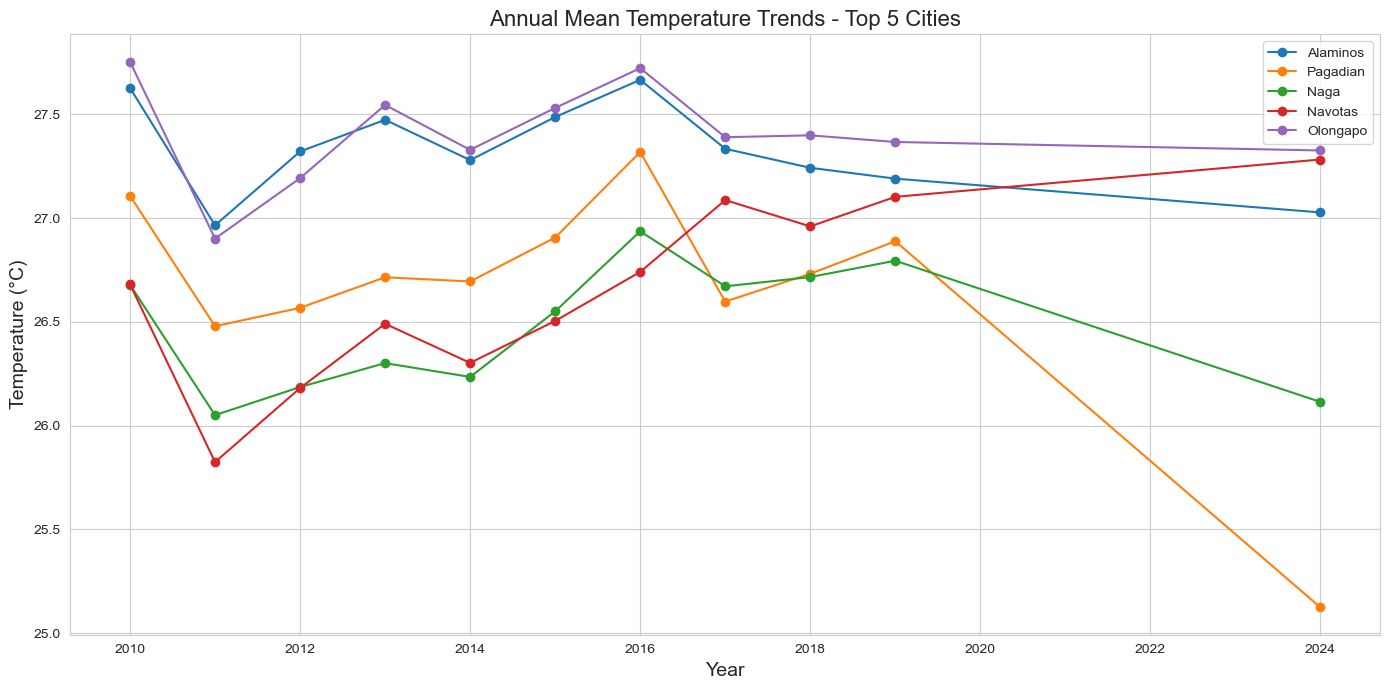

In [7]:
top_cities = df['city_name'].value_counts().index[:5]

plt.figure(figsize=(14,7))
for city in top_cities:
    city_data = city_annual[city_annual['city_name']==city]
    plt.plot(city_data['year'], city_data['temperature_2m_mean'], marker='o', label=city)

plt.title("Annual Mean Temperature Trends - Top 5 Cities", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## National Annual Averages

,year,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,2010,26.754925,29.815218,24.417068,35.217132,28.775704
1,2011,26.058326,28.735724,24.074555,33.784768,28.056986
2,2012,26.311362,29.066471,24.233124,34.264132,28.378345
3,2013,26.463914,29.256198,24.354479,34.523956,28.576260
4,2014,26.304286,29.104084,24.151001,34.129949,28.160388


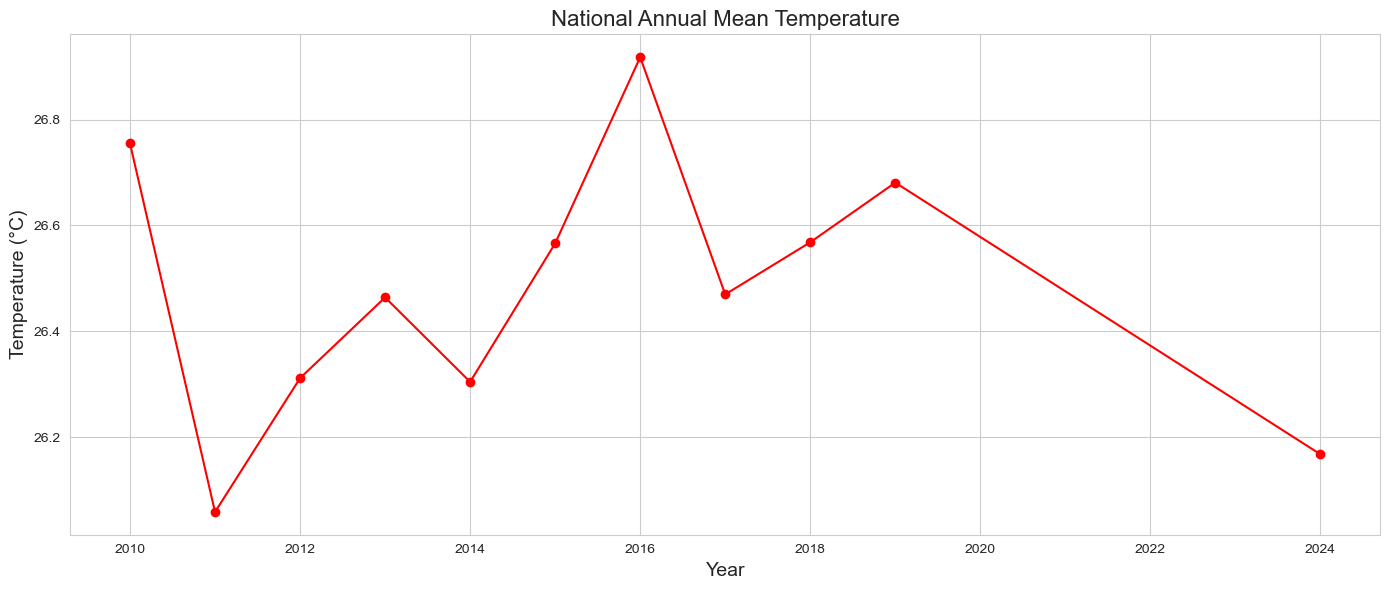

In [8]:
display(Markdown("## National Annual Averages"))

national_annual = df.groupby('year').agg({
    'temperature_2m_mean':'mean',
    'temperature_2m_max':'mean',
    'temperature_2m_min':'mean',
    'apparent_temperature_max':'mean',
    'apparent_temperature_min':'mean'
}).reset_index()

display(national_annual.head())

# Visualization
plt.figure(figsize=(14,6))
plt.plot(national_annual['year'], national_annual['temperature_2m_mean'], marker='o', color='red')
plt.title("National Annual Mean Temperature", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.tight_layout()
plt.show()

## Monthly & Seasonal Averages

,month,temperature_2m_mean,temperature_2m_max,temperature_2m_min
0,1,25.110247,27.829579,23.071017
1,2,25.412898,28.525483,22.959031
2,3,26.303713,29.671914,23.616593
3,4,27.544942,31.067229,24.696212
4,5,27.958879,31.217796,25.418102
5,6,27.243579,30.037606,25.128937
6,7,26.598656,29.186652,24.672279
7,8,26.656084,29.235199,24.740756
8,9,26.563835,29.260861,24.569511
9,10,26.417474,29.168429,24.322943


,season,temperature_2m_mean,temperature_2m_max,temperature_2m_min
0,DJF,25.685537,27.703502,24.141894
1,MAM,27.266181,30.647803,24.575673
2,JJA,26.828308,29.480495,24.844263
3,SON,26.439978,29.187770,24.374484


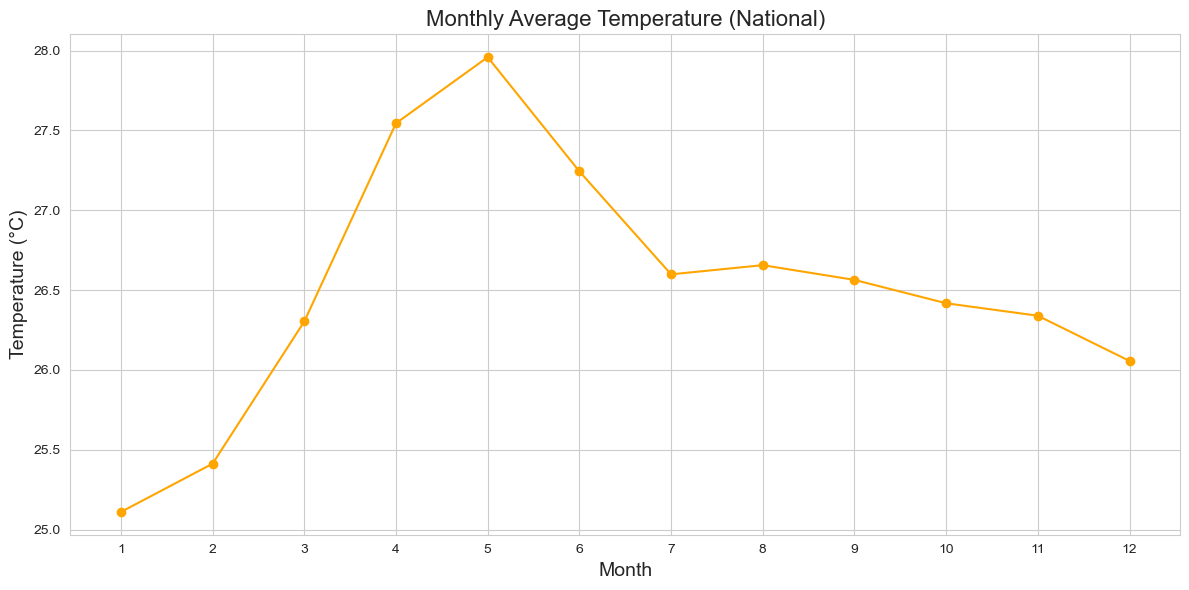

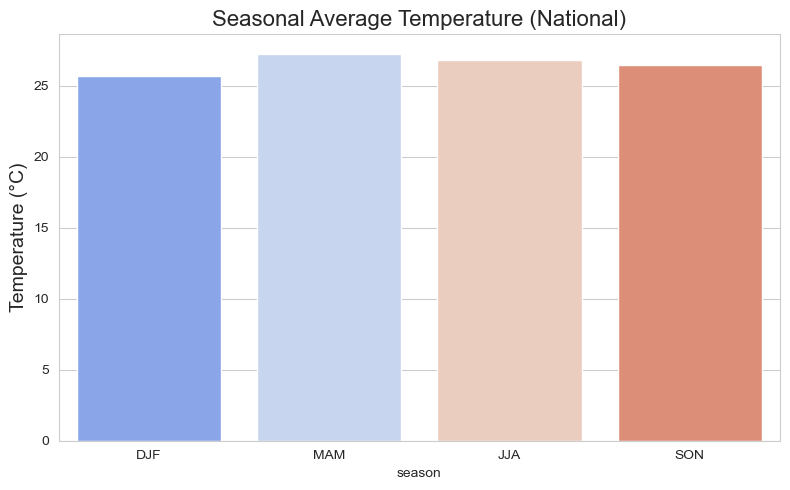

In [10]:
display(Markdown("## Monthly & Seasonal Averages"))

monthly_avg = df.groupby('month').agg({
    'temperature_2m_mean':'mean',
    'temperature_2m_max':'mean',
    'temperature_2m_min':'mean'
}).reset_index()

seasonal_avg = df.groupby('season').agg({
    'temperature_2m_mean':'mean',
    'temperature_2m_max':'mean',
    'temperature_2m_min':'mean'
}).reindex(['DJF','MAM','JJA','SON']).reset_index()

display(monthly_avg)
display(seasonal_avg)

# Line plot for monthly average temperature
plt.figure(figsize=(12,6))
plt.plot(monthly_avg['month'], monthly_avg['temperature_2m_mean'], marker='o', color='orange')
plt.title("Monthly Average Temperature (National)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

# Seasonal bar plot
plt.figure(figsize=(8,5))
ax = sns.barplot(data=seasonal_avg, x='season', y='temperature_2m_mean',
                 hue='season', dodge=False, palette='coolwarm')

if ax.get_legend():
    ax.get_legend().remove()
plt.title("Seasonal Average Temperature (National)", fontsize=16)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.tight_layout()
plt.show()


## City vs National Comparison

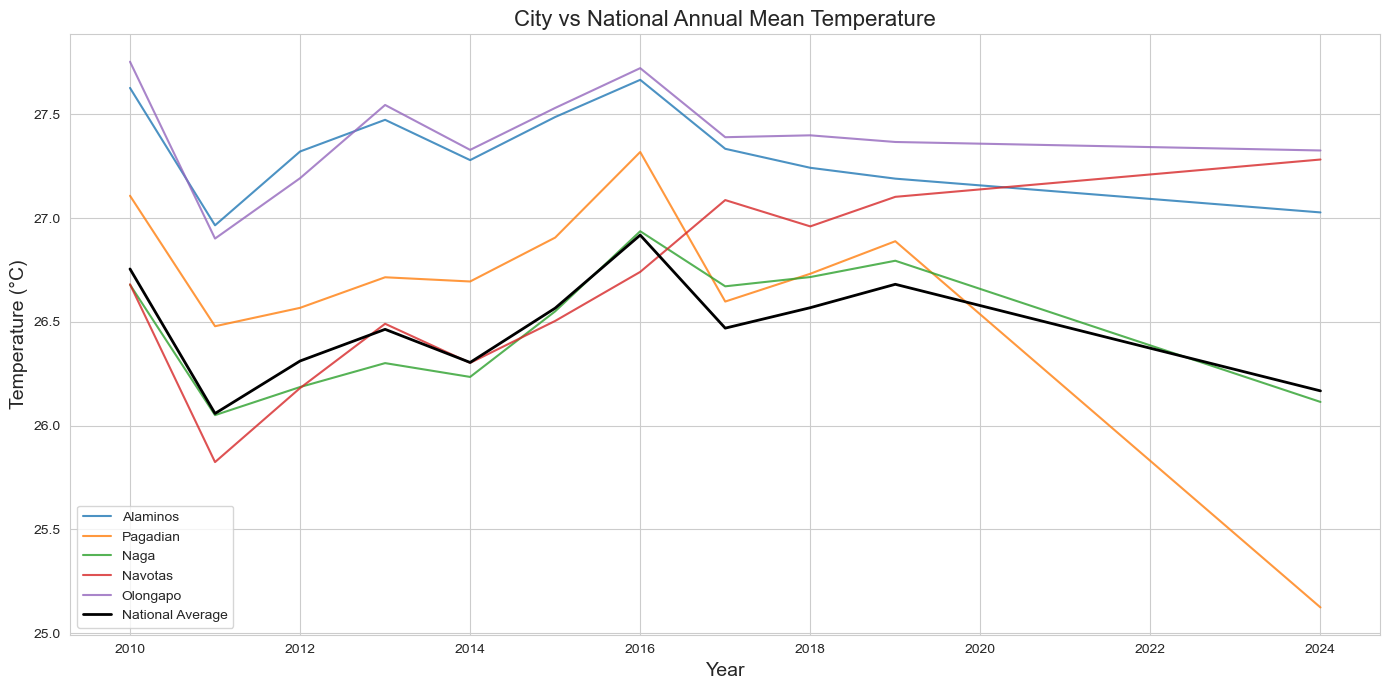

In [11]:
display(Markdown("## City vs National Comparison"))

plt.figure(figsize=(14,7))
for city in top_cities:
    city_data = city_annual[city_annual['city_name']==city]
    plt.plot(city_data['year'], city_data['temperature_2m_mean'], label=city, alpha=0.8)

plt.plot(national_annual['year'], national_annual['temperature_2m_mean'], label='National Average', color='black', linewidth=2)
plt.title("City vs National Annual Mean Temperature", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## Extreme Temperature Events

,city_name,temperature_2m_max,temperature_2m_min
132,Urdaneta,39.2,14.9
69,Lapu-Lapu City,38.9,21.0
44,Dapitan,38.9,21.0
82,Mandaue City,38.8,20.9
36,Cebu City,38.7,20.8


,city_name,temperature_2m_max,temperature_2m_min
121,Tagaytay City,32.2,15.2
67,Lamitan,32.2,21.6
79,Malaybalay,31.3,13.3
84,Marawi,29.6,15.6
6,Baguio,27.3,7.2


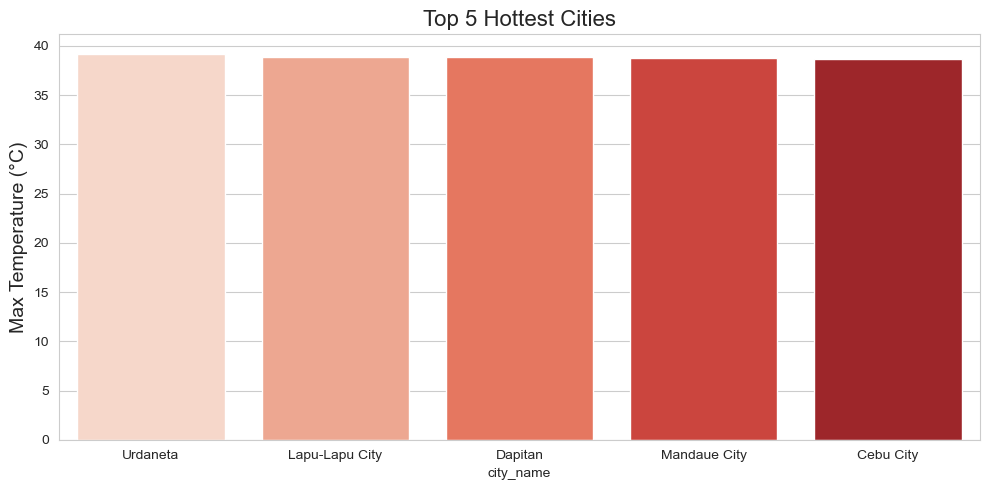

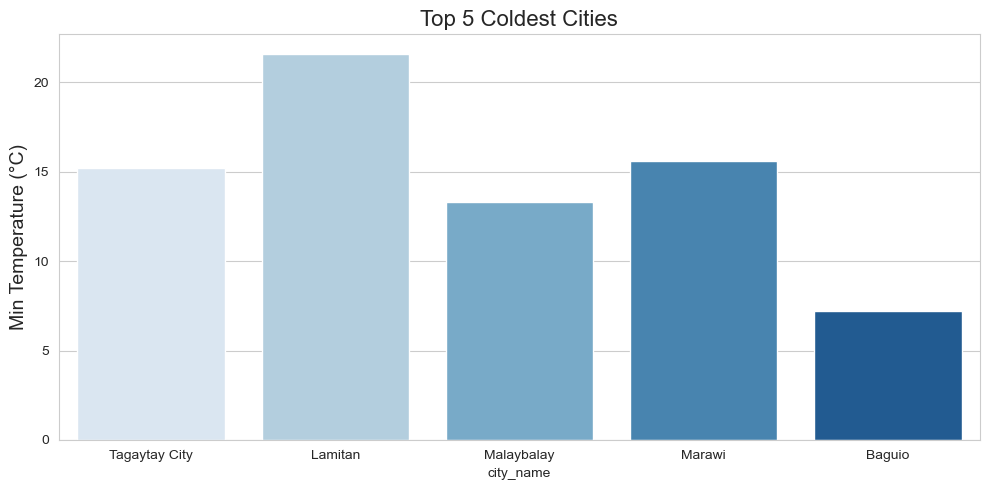

In [14]:
display(Markdown("## Extreme Temperature Events"))

# Hottest and coldest cities overall
city_extremes = df.groupby('city_name').agg({
    'temperature_2m_max':'max',
    'temperature_2m_min':'min'
}).reset_index().sort_values('temperature_2m_max', ascending=False)

display(city_extremes.head(5))  # Top hottest cities
display(city_extremes.tail(5))  # Top coldest cities

# Visualization: Top 5 hottest cities
plt.figure(figsize=(10,5))
sns.barplot(data=city_extremes.head(5), x='city_name', y='temperature_2m_max', hue='city_name', palette='Reds', dodge=False)
plt.title("Top 5 Hottest Cities", fontsize=16)
plt.ylabel("Max Temperature (°C)", fontsize=14)
plt.tight_layout()
plt.show()

# Top 5 coldest cities
plt.figure(figsize=(10,5))
sns.barplot(data=city_extremes.tail(5), x='city_name', y='temperature_2m_min', hue='city_name', palette='Blues', dodge=False)
plt.title("Top 5 Coldest Cities", fontsize=16)
plt.ylabel("Min Temperature (°C)", fontsize=14)
plt.tight_layout()
plt.show()

## Temperature Anomalies & Rolling Averages

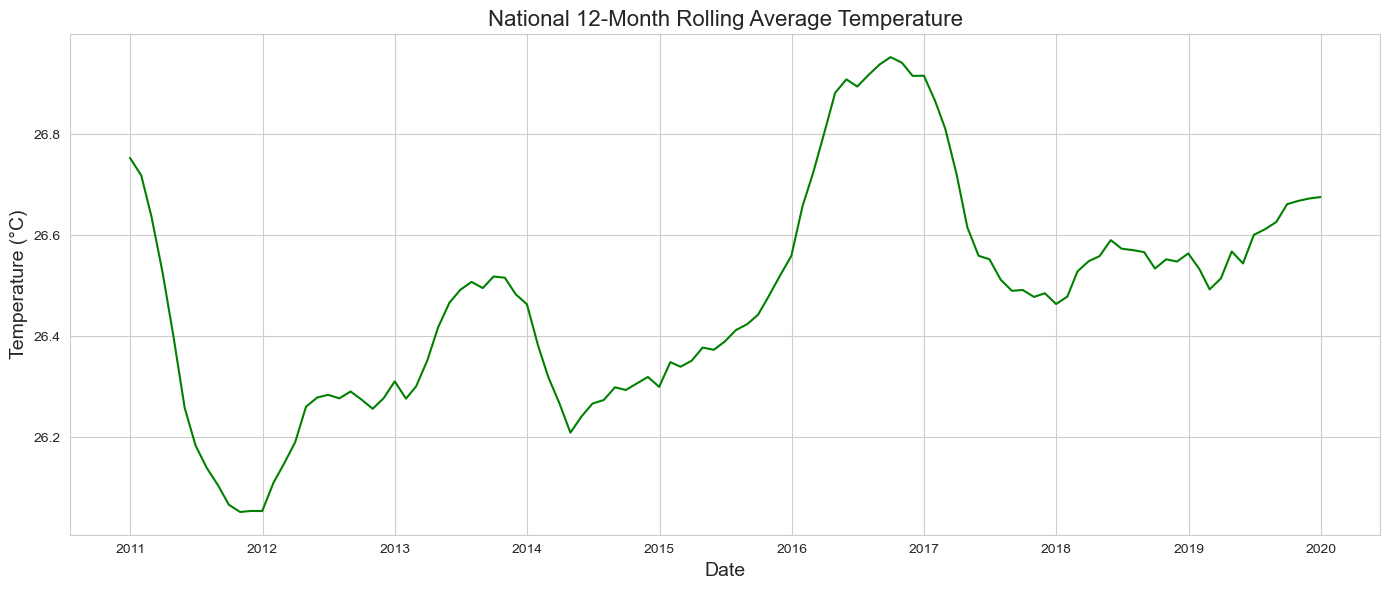

In [15]:
display(Markdown("## Temperature Anomalies & Rolling Averages"))

# Calculate temperature anomaly (difference from long-term mean per city)
df['temp_anomaly'] = df.groupby('city_name')['temperature_2m_mean'].transform(lambda x: x - x.mean())

# National rolling averages (12-month)
df.set_index('datetime', inplace=True)
national_rolling = df['temperature_2m_mean'].resample('M').mean().rolling(window=12).mean()

plt.figure(figsize=(14,6))
plt.plot(national_rolling.index, national_rolling.values, color='green')
plt.title("National 12-Month Rolling Average Temperature", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
display(Markdown("## Save Aggregated Results"))
agg_output_path = "../data/processed/phil_temp_aggregated.csv"
city_annual.to_csv(agg_output_path, index=False)
display(Markdown(f"Aggregated city-level annual data saved to `{agg_output_path}`"))